## 决策树和 K 近邻分类


---

#### 介绍

运用决策树和最近邻方法构建模型，并通过交叉验证调优

#### 知识点

- 决策树
- 最近邻
- 交叉验证
---

### 机器学习介绍

定义：

    假设用P来估算计算机长须在某类任务T上的性能，
    若一个长须利用经验E在任务T上获得了性能改善，
    则我们就说关于P和T，该程序对E进行了学习。
在不同的问题设定下，T、P、E 可能指完全不同的东西。机器学习中一些流行的任务 T 包括：

- 分类：基于特征将实例分为某一类。
- 回归：基于实例的其他特征预测该实例的数值型目标特征。
- 聚类：基于实例的特征实现实例的分组，从而让组内成员比组间成员更为相似。
- 异常检测：寻找与其他样本或组内实例有很大区别的实例。
- 其他更多任务

>经验 E 指的是数据（没有数据我们什么也干不了）。
> 根据训练方式，机器学习算法可以分为监督（supervised）和无监督（unsupervised）两类。
> 无监督学习需要训练含有很多特征的数据集，然后学习出这个数据集上有用的结构性质。
> 而监督学习的数据集除了含有很多特征外，
> 它的每个样本都要有一个标签（label）或目标（target）。

>关于算法表现的评估度量 P。
> 不同问题和算法的度量不同，当学习新算法时，我们将讨论这一点。
> 就目前而言，本次实验将使用分类算法中的一个简单度量标准，即准确率（Accuracy）。


下面看看分类和回归这两个监督学习问题。

---
### 决策树

决策树是分类与回归问题中常用的方法之一。
流程图实际上就是决策树的可视化表示

下面，我们基于「年龄」、「房产」、「收入」、「教育」特征使用决策树
解决一个二元分类问题，即「是否允许贷款」。

### 如何构建决策树


年龄、房产、收入、教育，这么多的特征首先应该关注哪个呢？



为了回答上述问题，先看一个简单的游戏，即「20个问题」游戏，这个游戏是这样玩的：A 心里想着一个名人，B 问 A 20 个问题，A 只能回答「是」或「否」，20 个问题之后 B 要猜出 A 心里想的那个名人是谁。首先问一个可以最大程度压缩剩余选项数目的问题会使 B 占据极大优势，例如询问「是不是安吉丽娜·朱莉？」，最多剔除一个选项，而询问「这个名人是女人吗？」将消除大约一半的选项。就是说，「性别」特征相比「安吉丽娜·朱莉」、「西班牙人」、「喜欢足球」等其他特征更能区分名人数据集。这背后的道理与熵有关，下面介绍熵的概念。


#### 熵

熵是一个在物理、信息论和其他领域中广泛应用的重要概念，可以衡量获得的信息量。对于具有 N 种可能状态的系统而言，熵的定义如下：

$$S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

其中，$p_i$ 是系统位于第 i 个状态的概率。熵可以描述为系统的混沌程度，熵越高，系统的有序性越差，反之亦然。熵将帮助我们高效的分割数据，类似帮助我们找出在「20个问题」游戏中先问什么问题较好。

#### 玩具示例

为了解释熵是如何有利于构建决策树模型的，让我们来看一个玩具示例，在这个示例中将基于球的位置预测它的颜色。

![小球](img.png)

这里有9个篮球和11个黄球。如果随机选择一个球，这个球是蓝色的概率 $p_1=\frac{9}{20}$ ,
是黄球的概率为 $p_2 = \frac{11}{20}$ , 这意味着熵

$S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}}\approx 1$ 。

这个值本身没有很多信息。
接下来

将球分为「位置小于等于 12、位置大于 12」这两组，如下图所示。

![分割小球位置](img_1.png)

那么分组后，熵如何变化？左边1组有13个求，（8蓝5黄）

计算熵为：

$$ S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96 $$
$$ S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6 $$

可见，两组的熵下降了，且右边降低很多。

由于熵实际上是系统混沌（或不确定性）的程度。熵的下降成为信息增益。
数学上，基于变量Q（例如这里的变量  x≤12  所做的分割，得到信息增益（IG）定义：

$$IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

其中， $q$ 是分割的数组， $N_i$ 是变量 $Q$ 等于第 $i$ 项的样本数目。在玩具实例中，有2个组（ $q=2$ ）,
一组有13个元素（ $N_1 = 13$ ）, 另一个组($N_2=7$).因此，信息增益为：

$$ IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

结果表明，根据「坐标小于或等于12」将球分为两组带来了一个更有序的系统。让我们继续分组，直到每组中的球颜色都一样。


![继续分割](img_2.png)

上图可见，右边那组只需根据「坐标小于或等于 18」再分割一次即可。而左边那组还需要三次分割。
注意，若组内所有球的颜色都一样，那么这个组的熵为 0（$\log_2{1} = 0$）。

通过这个例子，我们成功构建了一个基于球的位置预测球颜色的决策树。但倘若我们再向里面增加一个球，这个决策树就可能无法很好地工作，因为它完全拟合了训练集（初始的 20 球）。如果希望提升它的泛用性，那么一棵具有更少分支（「问题」）的决策树将有更好的效果。

### 决策树构建算法


在之前的例子中构建的决策树是最优的：它只需提 5 个「问题」（基于变量 Q），就完全拟合了训练集。其他分割条件会使得到的树更深，即需要更多「问题」才能获得答案。


构建决策树的流行算法（如 ID3 或 C4.5）的核心，是贪婪最大化信息增益：
在每一步，算法都会选择能在分割后给出最大信息增益的变量。
接着递归重复这一流程，直到熵为零（或者，为了避免过拟合，直到熵为某个较小的值）。
不同的算法使用不同的推断，通过「提前停止」或「截断」以避免构建出过拟合的树。

### 分类问题中其他的分割质量标准

上面我们讨论了熵是如何衡量树的分区的，但还有其他指标来衡量分割的好坏：

- 基尼不确定性（Gini uncertainty）：$G = 1 - \sum\limits_k (p_k)^2$

- 错分率（Misclassification error）：$E = 1 - \max\limits_k p_k$

实践中几乎从不使用错分率，而基尼不确定性和信息增益的效果差不多。

 二元分类问题的熵和基尼不确定性为：

$$ S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})}$$


$$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+)$$

其中 $p_+$ 是对象具有标签 + 的概率。

以 $p_+$ 为坐标，绘制上面两个函数的图像。

In [6]:
import warnings
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()
warnings.filterwarnings("ignore")

In [ ]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2*x*(1-x) for x in xx], label="gini")
plt.plot(xx, [2*2*x*(1-x) for x in xx], label="2*gini")
plt.plot(xx, [-x*np.log2(x)-(1-x)*np.log2(1-x) for x in xx], label="entropy")
plt.plot(xx, [1-max(x, 1-x) for x in xx], label="missclass")
plt.plot(xx, [2-2*max(x, 1-x) for x in xx], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Criteria of quality as a function of p+ (binary classification)")
plt.legend()

上图可见，熵的图像和两倍的基尼不确定性图像非常接近。
因此，在实践中，这两个指标的效果基本上是一样的。


#### 示例

下面用一棵决策树拟合一些合成数据。这些合成数据属于两个不同的类别，这两个类别的均值不同，但都呈现正态分布。

In [7]:
# 第一类
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# 第二类
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
# np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
# np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。
train_labels = np.r_[train_labels, np.ones(100)]

下面绘制数据。通俗地讲，这种情况下的分类问题就是构造一个「边界」，
能够较好的分开两个类别（红点和黄点）。这个「边界」若是一条直线的话可能太过简单，
若是沿着每个红点画出的蛇形曲线又太过复杂（这将导致其在新数据上的表现很差）。
从直觉上说，某种平滑的边界，在新数据上的效果会比较好。



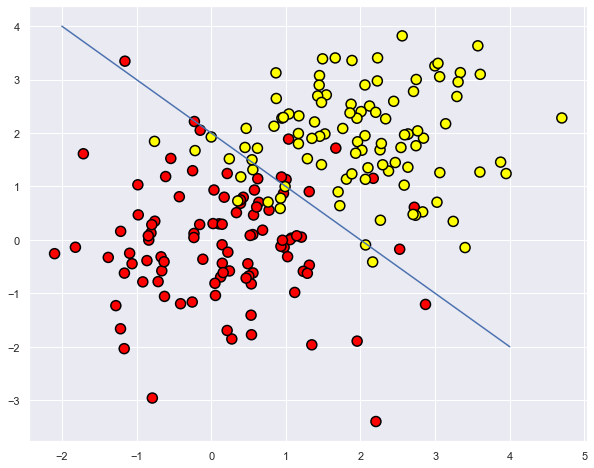

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2, 5), range(4, -3, -1))

下面训练一棵 sklearn 决策树，区分这两类数据点。最后可视化所得的边界。

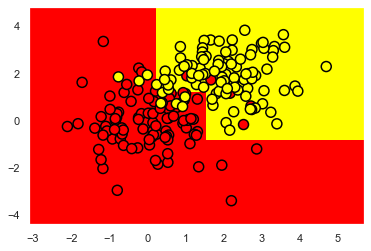

In [9]:
from sklearn.tree import DecisionTreeClassifier
# 编写一个辅助函数，返回之后的可视化网格


def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    # x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]  # 左开右闭
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


#  max_depth参数限制决策树的深度
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                  random_state=17)
# 训练决策树
clf_tree.fit(train_data, train_labels)
# 可视化
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(),
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)

通过 pydotplus 和 export_graphviz 库我们可以方便的看到决策树本身是怎样的。
使用 `StringIO()` 函数开辟一个缓存空间保存决策树，
通过 `export_graphviz()` 函数以 DOT 格式导出决策树的 GraphViz 表示，
然后将其写入 out_file 中。使用 `graph_from_dot_data()`
函数读入数据并通过 `Image()` 函数显示决策树。
